<a href="https://colab.research.google.com/github/Tulsirammeena/SPAM-HAM_CLASSIFICATION/blob/main/SPAM_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('spam_ham_dataset.csv')

In [ ]:
df.sample(5)

,Unnamed: 0,label,text,label_num
3782,200,ham,"Subject: 98 - 6240\r\ndaren ,\r\nthe above met...",0
575,3620,ham,Subject: enron files chapter 11 reorganization...,0
1338,2565,ham,"Subject: meter 5097\r\ndaren ,\r\ndo you know ...",0
1085,3302,ham,Subject: re : nom / actual vols for 24 th\r\n-...,0
1631,3562,ham,Subject: enbridge buys koch ' s east texas mid...,0


In [ ]:
df.shape

(5171, 4)

In [ ]:
#1.Data cleaning
#2.EDA
#3.Text Preprocessing
#4.model building
#5.evaluation
#6.Improvement
#7.Website
#8.Deploy

#DATA CLEANING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [ ]:
#drop non required columns
df.drop(columns = ['Unnamed: 0', 'label_num'],inplace = True)

In [ ]:
df.sample(5)

,label,text
364,ham,Subject: fwd : wazzzup 2 nd version\r\n- - - -...
4889,spam,Subject: news : rolex sale - and other brands\...
966,spam,Subject: finally have a big dick\r\nreally lay...
3921,ham,Subject: ces deals\r\nrick ward manages their ...
1105,ham,Subject: update on prc process\r\nplease read ...


In [ ]:
df.rename(columns={'label':'target'},inplace = True)
df.sample(5)

,target,text
166,ham,Subject: equistar sale off of tejas or midcon\...
4009,ham,Subject: meter 5892 south katy gas unit 2 - al...
3385,ham,"Subject: hpl nom for july 20 , 2000 - revision..."
268,ham,"Subject: re : coastal o & g , mtr . 4179 , gol..."
5058,ham,Subject: desk to desk ticket between nng and p...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target']=encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


In [ ]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
df.duplicated().sum()

178

In [ ]:

df = df.drop_duplicates(keep='first')

In [ ]:
df.shape

(4993, 2)

#2.EDA(exploratory data analysis)

In [ ]:
df.head()
df['target'].value_counts()

0    3531
1    1462
Name: target, dtype: int64

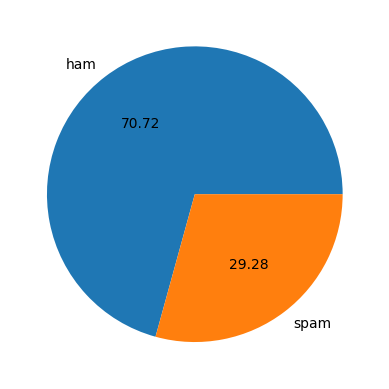

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],autopct = "%0.2f")
plt.show()

In [ ]:
#data is imblance

In [ ]:
#calculate no. of words, characters, sentences
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#num of character
df['num_characters'] = df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_characters
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524
3,1,"Subject: photoshop , windows , office . cheap ...",414
4,0,Subject: re : indian springs\r\nthis deal is t...,336


In [ ]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551
3,1,"Subject: photoshop , windows , office . cheap ...",414,49
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71


In [ ]:
# num of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,13.386942
std,1547.863387,340.702932,27.959959
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,4.000000
50%,557.000000,125.000000,7.000000
75%,1262.000000,288.000000,15.000000
max,32258.000000,8863.000000,1204.000000


In [ ]:
#for ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3531.000000,3531.000000,3531.000000
mean,994.939394,230.516001,11.662419
std,1402.785831,337.018933,25.330035
min,18.000000,3.000000,1.000000
25%,241.000000,53.000000,4.000000
50%,538.000000,128.000000,7.000000
75%,1253.500000,298.500000,13.500000
max,32258.000000,8863.000000,1204.000000


In [ ]:
#for spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1462.000000,1462.000000,1462.000000
mean,1249.326265,241.315321,17.551984
std,1840.112883,349.439381,33.111447
min,11.000000,2.000000,1.000000
25%,304.250000,60.000000,4.000000
50%,589.000000,119.500000,9.000000
75%,1305.000000,252.750000,19.000000
max,22073.000000,3963.000000,693.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

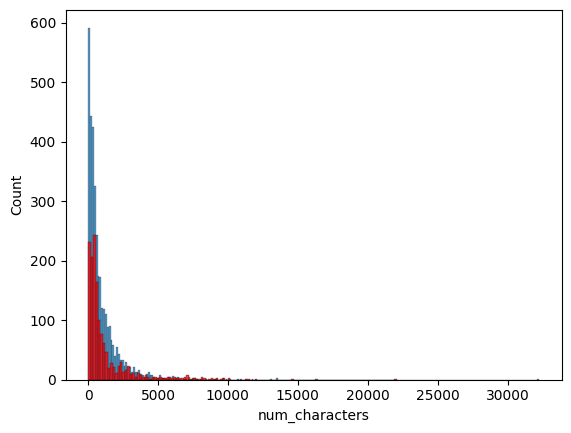

In [ ]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

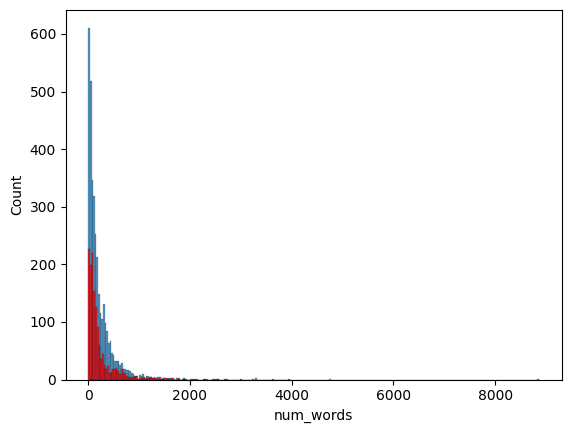

In [ ]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color = 'red')

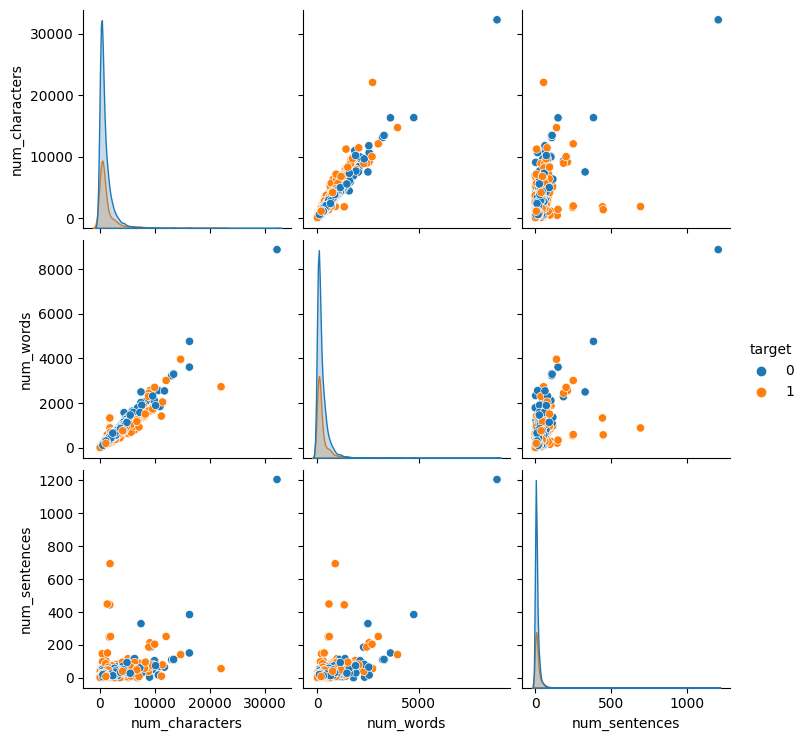

In [ ]:
sns.pairplot(df,hue = 'target')

<ipython-input-81-2d3646dd07cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

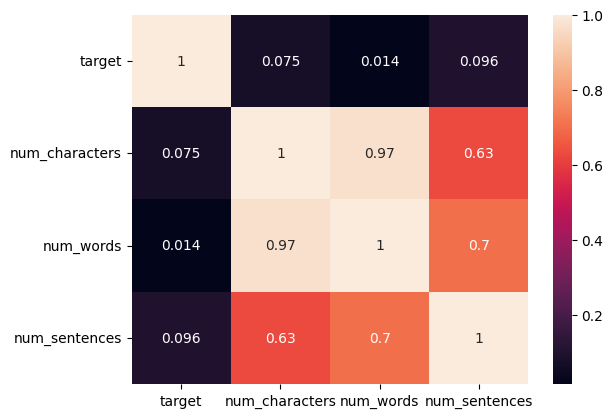

In [ ]:
sns.heatmap(df.corr(),annot = True)

#3. Data Processing
    *Lower case
    *Tokenization
    *Removing special characters
    *Removing stop words and punctuation
    *stemming

In [ ]:
import string
string.punctuation
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'love'

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y =[]
    sub = ['subject']
    for i in text:
      if i.isalnum():
        y.append(i)
    text = y[:]
    y.clear()
    for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation and i not in sub:
        y.append(i)
    text = y[:]
    y.clear()

    for i in text:
      y.append(ps.stem(i))
    return " ".join(y)

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3,enron methanol meter 988291 follow note gave m...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,3,hpl nom januari 9 2001 see attach file hplnol ...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,24,neon retreat ho ho ho around wonder time year ...
3,1,"Subject: photoshop , windows , office . cheap ...",414,49,3,photoshop window offic cheap main trend abas d...
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71,3,indian spring deal book teco pvr revenu unders...


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size=10, background_color = 'white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

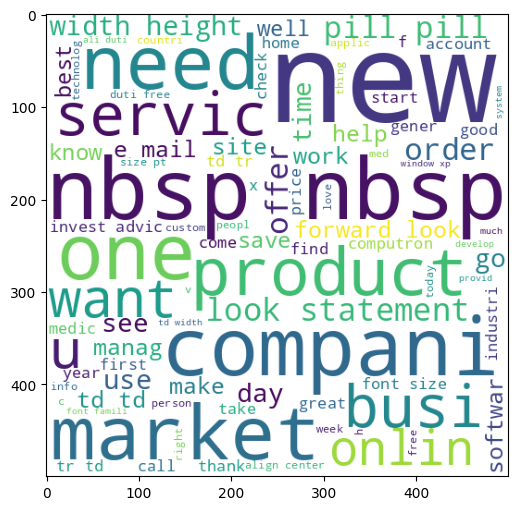

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

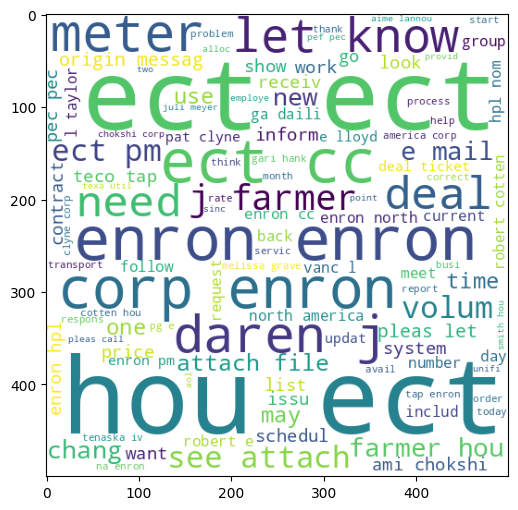

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3,enron methanol meter 988291 follow note gave m...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,3,hpl nom januari 9 2001 see attach file hplnol ...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,24,neon retreat ho ho ho around wonder time year ...
3,1,"Subject: photoshop , windows , office . cheap ...",414,49,3,photoshop window offic cheap main trend abas d...
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71,3,indian spring deal book teco pvr revenu unders...


In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [ ]:
len(spam_corpus)

194972

<function matplotlib.pyplot.show(close=None, block=None)>

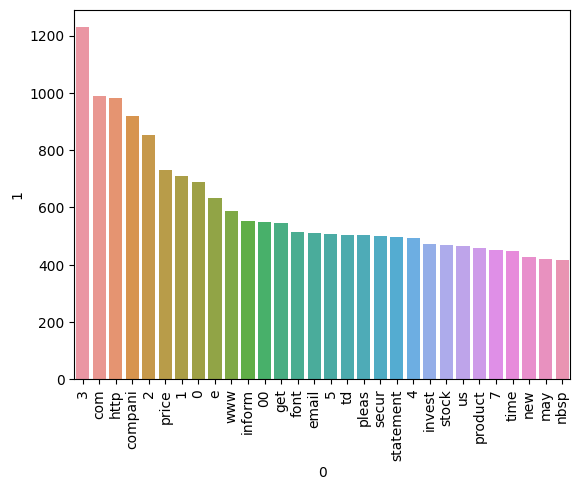

In [ ]:
from collections import Counter
x = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=x[0],y = x[1])
plt.xticks(rotation = 'vertical')
plt.show

In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)
len(ham_corpus)

374267

<function matplotlib.pyplot.show(close=None, block=None)>

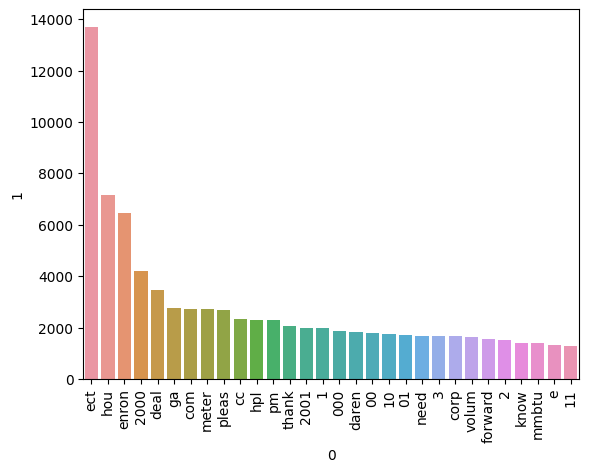

In [ ]:
from collections import Counter
x = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=x[0],y = x[1])
plt.xticks(rotation = 'vertical')
plt.show

#4.Model Building

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3,enron methanol meter 988291 follow note gave m...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,3,hpl nom januari 9 2001 see attach file hplnol ...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,24,neon retreat ho ho ho around wonder time year ...
3,1,"Subject: photoshop , windows , office . cheap ...",414,49,3,photoshop window offic cheap main trend abas d...
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71,3,indian spring deal book teco pvr revenu unders...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(4993, 42592)

In [ ]:
y = df['target'].values
y

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9409409409409409
[[669  28]
 [ 31 271]]
0.9063545150501672


In [ ]:
#precison is better so we will take that
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9099099099099099
[[696   1]
 [ 89 213]]
0.9953271028037384


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8468468468468469
[[677  20]
 [133 169]]
0.8941798941798942


#I will use multinomial classifier because its precision is best compare to others

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
class MultinomialNB:
    def __init__(self, alpha=1):
        self.alpha = alpha

    def fit(self, X_train, y_train):
        num_features = X_train.shape[1]
        self.classes, counts = np.unique(y_train, return_counts=True)
        self.class_probs = counts / len(y_train)
        self.feature_probs = np.zeros((len(self.classes), num_features))

        for c, cls in enumerate(self.classes):
            X_class = X_train[y_train == cls]
            self.feature_probs[c, :] = (X_class.sum(axis=0) + self.alpha) / (X_class.sum() + self.alpha * num_features)

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            posteriors = np.log(self.class_probs) + (np.log(self.feature_probs) * x).sum(axis=1)
            y_pred.append(self.classes[np.argmax(posteriors)])
        return np.array(y_pred)

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return np.mean(y_pred == y_test)


mnb = MultinomialNB()

accuracy = mnb.score(X_test_tfidf, y_test)

print("Accuracy:", accuracy)

In [ ]:
def confusion_matrix(y_true, y_pred):
    classes = np.unique(np.concatenate((y_true, y_pred)))
    cm = np.zeros((len(classes), len(classes)), dtype=int)
    for t, p in zip(y_true, y_pred):
        cm[np.where(classes == t), np.where(classes == p)] += 1
    return cm

def precision_score(y_true, y_pred, average="binary"):
    cm = confusion_matrix(y_true, y_pred)
    if average == "binary":
        assert len(cm) == 2, "For binary average, data must be binary"
        tp, fp = cm[1, 1], cm[0, 1]
        return tp / (tp + fp)
    elif average == "micro":
        tp_sum = np.diag(cm).sum()
        fp_sum = cm.sum(axis=0).sum() - tp_sum
        return tp_sum / (tp_sum + fp_sum)
    elif average == "macro":
        precisions = []
        for i in range(len(cm)):
            tp, fp = cm[i, i], cm[:, i].sum() - cm[i, i]
            if tp + fp == 0:
                precisions.append(0)
            else:
                precisions.append(tp / (tp + fp))
        return np.mean(precisions)
    else:
        raise ValueError("Unknown average type")

# Calculate confusion matrix and precision score
cm = confusion_matrix(y_test, y_pred)
ps = precision_score(y_test, y_pred, average="binary")  # Change "binary" to "micro" or "macro" if needed

print("Confusion matrix:")
print(cm)
print("Precision score:", ps)